<a href="https://colab.research.google.com/github/chogh824/machine-learning/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')

In [3]:
combine=[train,test]  # 모델 적용의 일관성을 위해, train과 test를 합한 combine 데이터셋도 지정함

In [4]:
print(train.columns.values) # 데이터 변수 확인

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**변수 설명**

PassengerID : 각 승객의 고유 번호

Survived : 생존 여부(0=사망, 1=생존)

Pclass : 객실 등급 - 1,2,3등석

Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 **Sib**ling(형제자매)와 **Sp**ouse(배우자)의 수

Parch : 동반한 **Par**ent(부모) **Ch**ild(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항 (C = Cherbourg, Q = Queenstown S = Southampton)

In [5]:
train.head()  # Cabin의 값들 중에 NaN이 있다는 것을 확인할 수 있음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
test.head() # train 세트와 비교해 보았을 때 Survived 행이 빠진 것을 확인할 수 있음.
            # Cabin의 값이 다 NaN 값이라는 것도 확인할 수 있음.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info() 메서드

데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인

만약 누락값이 있다면, 그 데이터를 버리거나 평균값을 넣을 수 있음

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


훈련 세트에서는 Age에서 177개, Cabin에서는 687개, Embarked에서는 2개의 값이 빠졌다는 것을 확인할 수 있음.

테스트 세트에서는 Age에서 86개, Fare에서는 1개, Cabin에서는 327개의 값이 빠졌다는 것을 확인할 수 있음.

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


객실 등급이 좋을수록 생존률이 높은 것을 확인할 수 있음!

In [14]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


여성의 생존율이 남성보다 높은 것을 확인할 수 있음

In [15]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


함께 승선한 형제자매와 배우자 수에 따른 생존율 비교

In [16]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


동행이 적은 경우, 생존율이 높음!

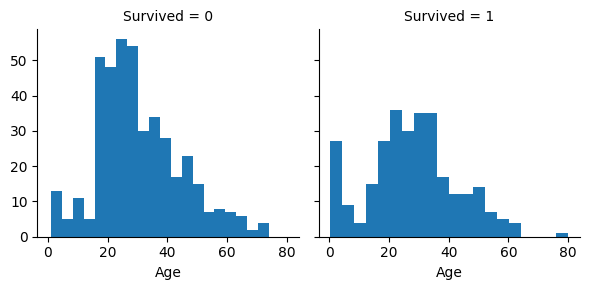

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(train, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

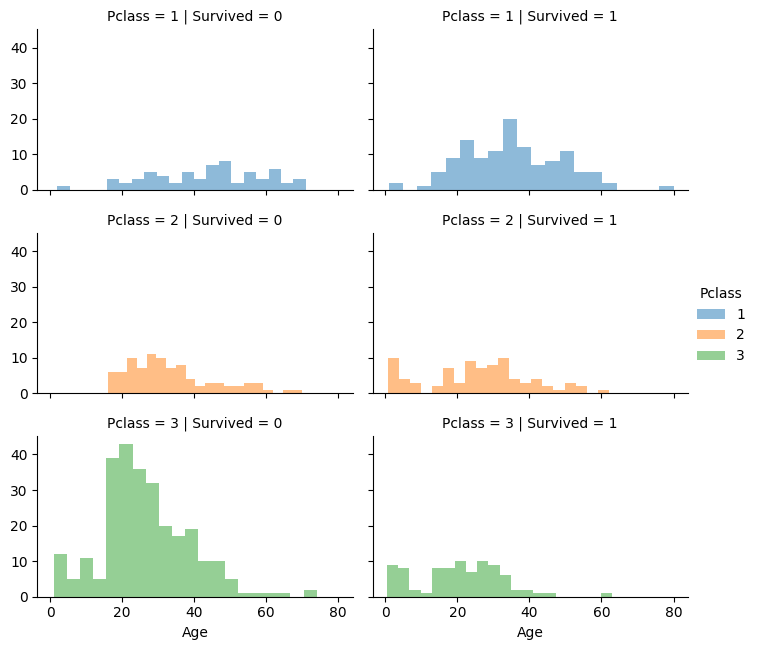

In [18]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(train, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

객실 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음

객실 등급이 2등급인 유아는 대부분 생존함

객실 등급이 1등급인 경우 생존율이 비교적 높음

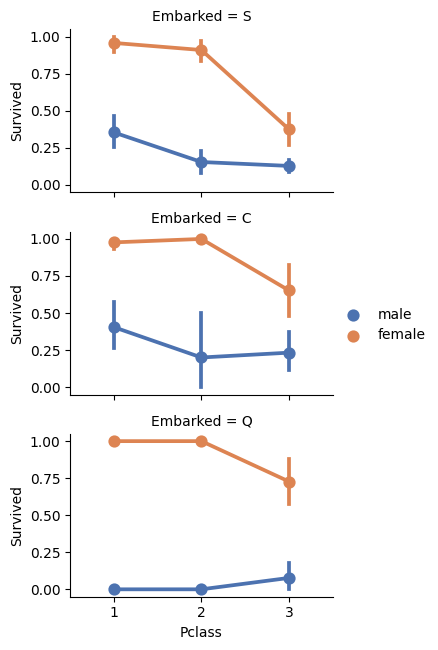

In [19]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

승선지가 C와 Q인 경우, 남성의 티켓 등급이 3등급일 때 2등급보다 생존율이 높을 가능성이 있음

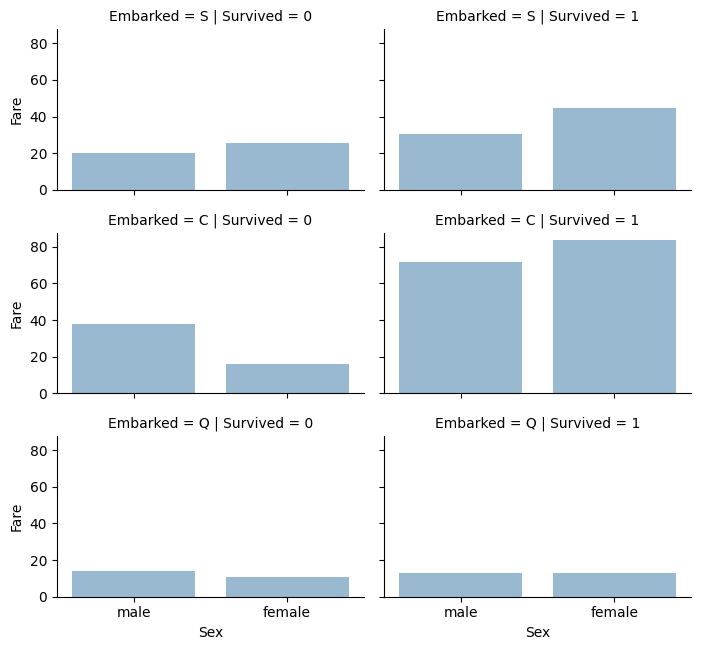

In [20]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

승선지가 S 또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음

In [21]:
# 훈련 데이터
train.drop(["Ticket", "Cabin"], axis=1, inplace = True)
# 테스트 데이터
test.drop(["Ticket", "Cabin"], axis=1, inplace = True)

Ticket으로는 생존자를 예측하는데 어려움이 있고, Cabin은 NaN값이 너무 많아 버리기로 함

In [22]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #'([A-Za-z]+).'는 정규표현식인데, 공백으로 시작하고, .으로 끝나는 문자열을 추출할 때 사용

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Miss, Mrs, Master, Mr가 대부분임을 확인할 수 있음

In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Rev', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.154876
3,Mrs,0.793651
4,Other,0.470588


In [24]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [25]:
train = train.drop(['Name', 'PassengerId'], axis=1)   #Name로 Title 열을 추가로 만들었으니 삭제해도 무방함! PassengerId도 필요없는 변수
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

In [26]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


여자를 1, 남자를 0으로 int형으로 바꿔서 저장

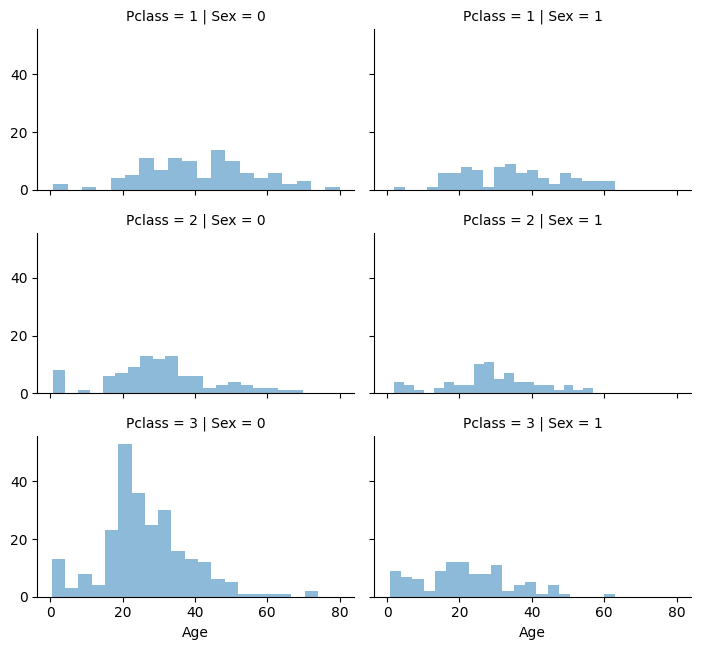

In [27]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

객실 등급과 성별 시각화

Pclass, Sex와 Age와의 결합이 2열 3행으로 구성되어 있는 것을 확인할 수 있음

In [28]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름

            age_guess = guess.median()

            # age의 random값의 소수점을 .5에 가깝도록 변형
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

성별과 객실 등급에 따라 해당 데이터에서 NaN값을 제외한 중간값을 계산하여 Age의 결측치를 대체하였음!

In [29]:
train['AgeBand'] = pd.cut(train['Age'], 5)  #pd.cut은 연속형 데이터를 이산적인 범주로 나누는데 유용한 함수임
# 임의로 5개 그룹을 지정
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


연령 변수를 범주형 변수로 바꿔줌. 구간이 5개로 나뉜 것을 확인해볼 수 있음!

In [30]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1   #특성 공학

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


자료를 더 깔끔하게 만들기 위해 SibSp와 Parch를 가족과의 동반여부를 알 수 있는 새로운 변수로 통합! SibSp나 Parch 둘 다 동행이 적어야 생존율이 높다는 것을 위해서 확인했기 때문에 통합해도 괜찮을 것이라 판단함

FamilySize가 1인 것은 가족과 동반하지 않고 혼자 승선했다는 것을 의미함

In [32]:
for dataset in combine:       # 특성 공학
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


1은 동반하지 않고, 0는 동반한 것이라는 새로운 변수 IsAlone을 생성함

In [33]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


IsAlone와 중복되는 특성인 'Parch','SibSp','FamilySize'는 버리기로 함!

In [34]:
train["Embarked"].value_counts().sort_values(ascending = False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

Embarked의 NaN 값을 최빈값으로 대체하였음!

In [36]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


Embarked 변수를 범주형 변수로 바꾸어주었음

In [38]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


요금(Fare)의 NaN값을 중앙값으로 대체하였음

In [39]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


요금 변수 또한 숫자 범주형 변수로 바꾸어줌

In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]

train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,1,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,0
8,1,3,1,1,1,0,3,0
9,1,2,1,0,2,1,3,0


In [41]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
5,897,3,0,0,1,0,1,1
6,898,3,1,1,0,2,2,1
7,899,2,0,1,2,0,1,0
8,900,3,1,1,0,1,3,1
9,901,3,0,1,2,0,1,0


In [146]:
#훈련 세트에서 타깃 제거
train_input = train.drop("Survived", axis=1)
#타깃 역할
train_target = train["Survived"]
#예측 대상 데이터셋
test_input = test.drop("PassengerId", axis=1).copy()
train_input.shape, train_target.shape, test_input.shape

((891, 7), (891,), (418, 7))

In [147]:
train_target.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

## **NaN(Not A Number) 값을 어떻게 처리했는가?**

Cabin 안에 있던 NaN값은 대부분이 NaN이었기 때문에 값을 넣는게 어려울 것이라 판단하여 행 자체를 drop하였음.

테스트 세트에 있던 Fare 결측치는 중앙값을 넣었고, 훈련 세트에 있던 Embarked 결측치는 최빈값으로 대체하였음.

마지막으로 Age NaN은 크기가 2x3인 배열 guess_age에 [성별, 승선 클래스]에 따라 나이를 추측한 값을 저장하고, 성별과 승선 클래스에 따라 guess_ages에서 추측한 값을 사용하여 결측값을 대체하였음. 해당 그룹 나이 값의 중간값이 저장되었음.
Age 같은 경우 NaN 값이 많았으나, 그 값들을 버리기엔 데이터셋이 너무 빈약하다 판단하여 중앙값을 저장하였음

## **왜 이렇게 훈련 및 테스트 세트를 만들었는가?**

Name, Sex, Embarked와 같은 컬럼들은 object형태이기 때문에 전처리를 통해서 int타입으로 바꿔주었고, 범위가 다소 넓은 Age, Fare 같은 경우도 전처리를 통해 int타입으로 바꿔주었다.

전처리만 잘하면 너무나 명확하게 훈련 세트와 테스트 세트를 나눌 수 있는 데이터셋이었고, 훈련 및 테스트 세트의 타깃을 생존 여부로 설정하였다.

# SGDClassifier

In [148]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    train_input, train_target, random_state=201935342)

In [149]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [150]:
from sklearn.linear_model import SGDClassifier

In [151]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=201935342)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.5973053892215568
0.6367713004484304


반복 횟수가 너무 맞아 정확도가 낮은 것을 확인해볼 수 있음

In [152]:
sc.partial_fit(train_scaled, train_target)  # 점진적 학습을 통한 최적화

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7485029940119761
0.6905829596412556


fit() 대신 partial_fit()을 사용

partial_fit()은 무조건 한 번의 epoch만 수행

이 경우 partial_fit()에 classes로서 훈련 세트에 있는 전체 클래스의 레이블을 지정해줘야 함

참고:_는 나중에 사용하지 않고 그냥 버리는 값을 넣어주는 용도로 사용

In [153]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=201935342)

train_score = []
test_score = []

classes = np.unique(train_target)

In [154]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

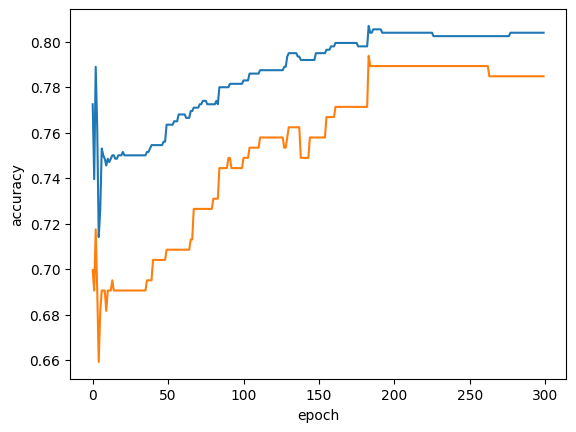

In [191]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()  # 대략 220번째 이후부터 과대적합이 일어날 것임을 보여주는 그래프

In [190]:
sc = SGDClassifier(loss='log_loss', max_iter=220, tol=None, random_state=201935342)   #그렇기에 하이퍼파라미터 max_iter를 220으로 지정해서 최적화하였음!
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8143712574850299
0.8116591928251121


SGDClassifier로 얻은 결과값: 대략 81.16점

# 결정트리

In [53]:
# 타깃 제거
train_input = train.drop("Survived", axis=1)
# 타깃 역할
train_target = train["Survived"]
#예측 대상 데이터셋
test_input = test.drop("PassengerId", axis=1).copy()
train_input.shape, train_target.shape, test_input.shape

((891, 7), (891,), (418, 7))

In [54]:
print(train_input.shape, test_input.shape)

(891, 7) (418, 7)


In [55]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    train_input, train_target, random_state=201935342)

In [56]:
from sklearn.preprocessing import StandardScaler    # 전처리 과정

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [57]:
from sklearn.tree import DecisionTreeClassifier     # 기본 모델

dt = DecisionTreeClassifier(random_state=201935342)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8682634730538922
0.820627802690583


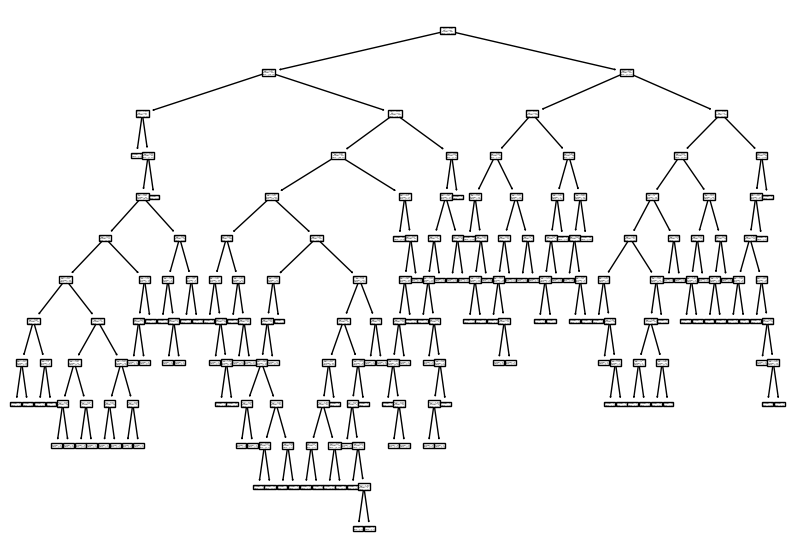

In [58]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()      # 맨 위에 있는 것이 루트 노드, 맨 아래에 있는 것이 리프 노드

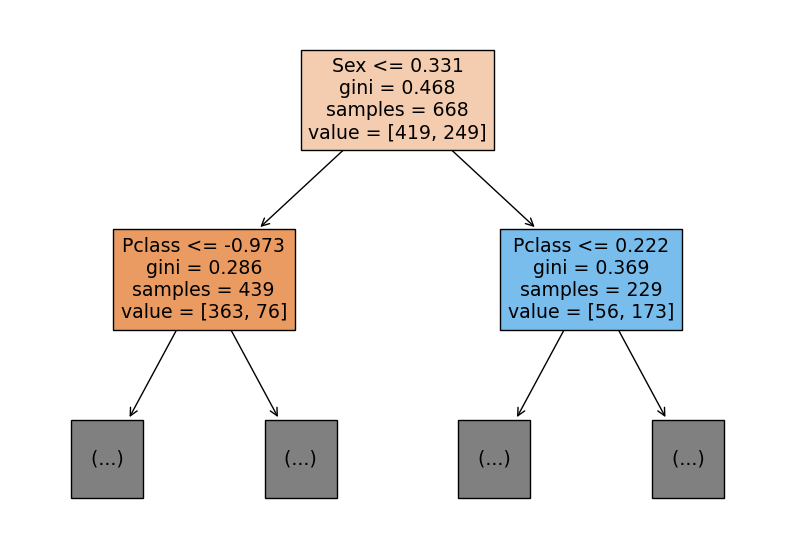

In [59]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Pclass','Sex','Age','Fare','Embarked','Title','IsAlone'])   #max_depth를 1로 주면 루트 노드를 제외하고 하나의 노드만 확장하여 그림
plt.show()    # 생존 비율이 높을수록 파란색, 사망 비율이 높을수록 주황색

In [60]:
dt = DecisionTreeClassifier(max_depth=3, random_state=201935342)  # 트리 깊이를 3으로 제한했을 때의 평가
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8233532934131736
0.7757847533632287


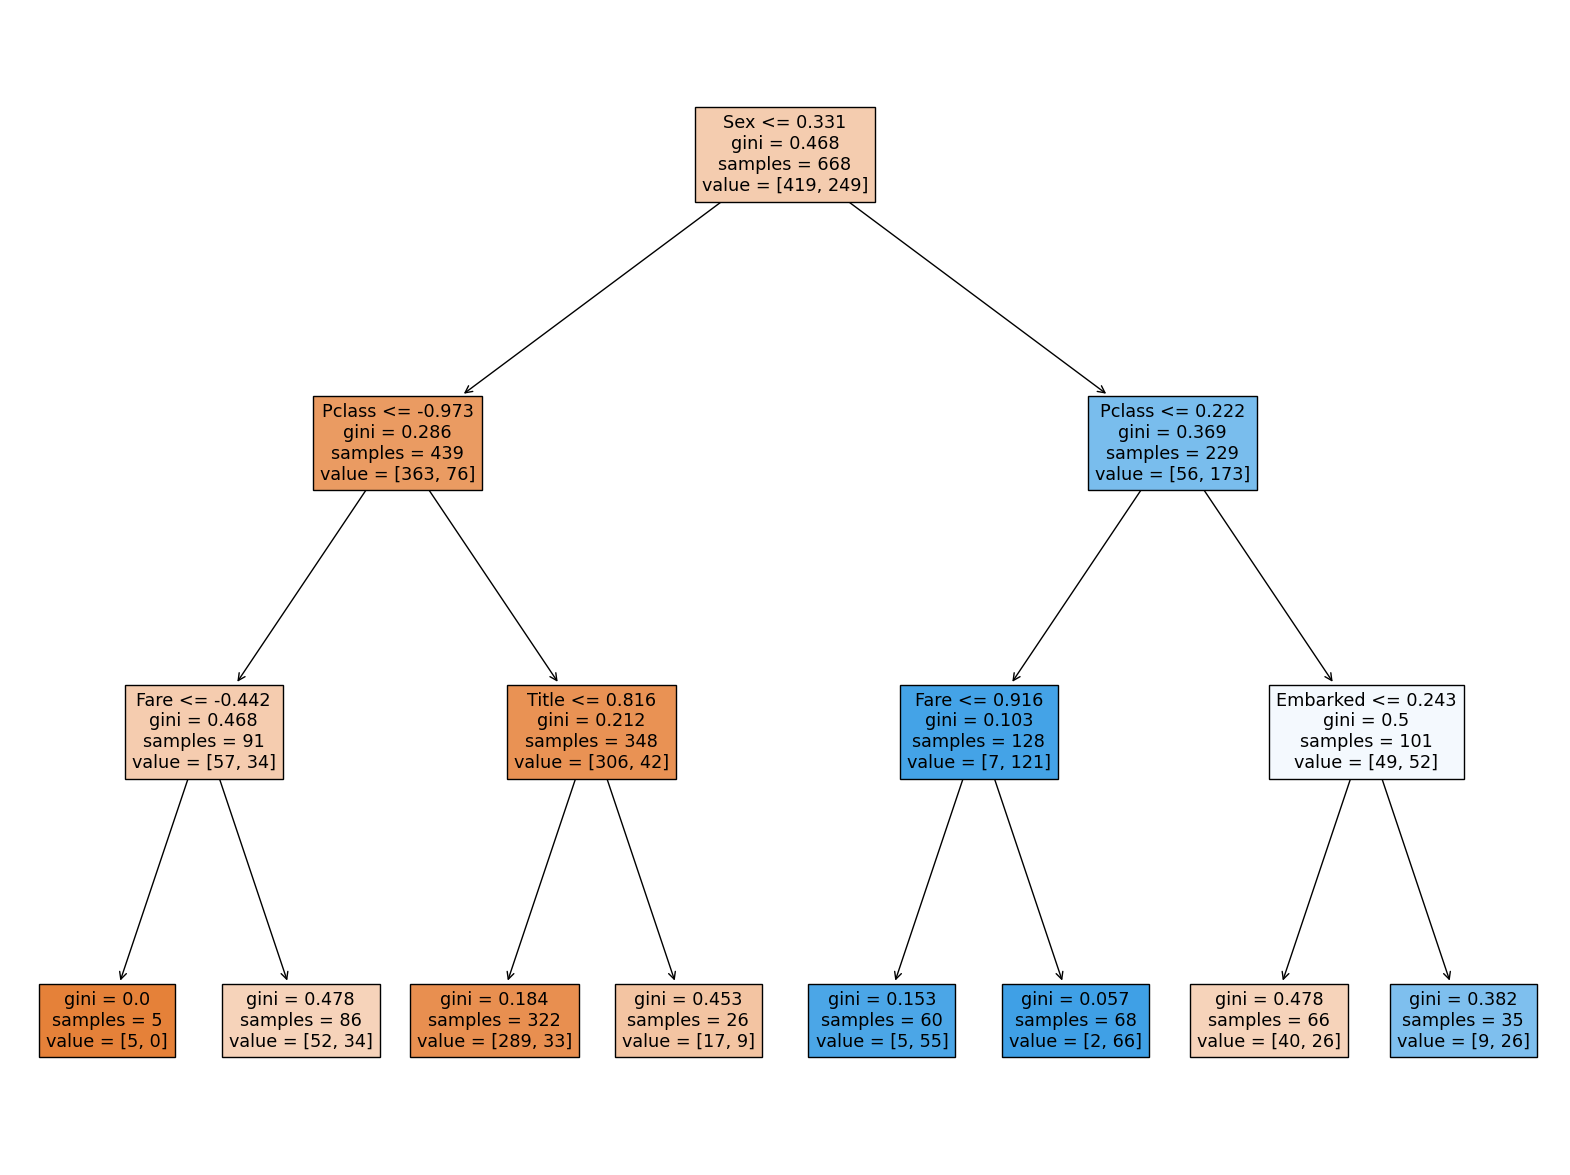

In [61]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Pclass','Sex','Age','Fare','Embarked','Title','IsAlone'])
plt.show()

In [62]:
print(dt.feature_importances_)  # 특성 중요도

[0.21187174 0.71724018 0.         0.01168203 0.03913162 0.02007442
 0.        ]


In [108]:
from sklearn.model_selection import GridSearchCV  # 그리드 서치로 최적의 하이퍼파라미터를 구하는 과정

In [109]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10),
          }

min_impurity_decrease는 트리의 분할을 결정하는데 중요한 하이퍼파라미터이기 때문에 0.0001에서 늘려가면서 9번 반복할 예정이다.

max_depth는 의사결정나무가 성장할 수 있는 최대 깊이를 나타내는 하이퍼 파라미터로, 이 값을 설정하여 모델의 복잡성을 제어하고 과적합을 방지하기 위해 그리드 서치를 통해 교차검증을 할 예정이다.

min_samples_split은 노드를 분할하기 위해 필요한 최소 샘플 수를 나타내며, 이 하이퍼파라미터를 통해 노드 분할이 언제 일어나야 하는지를 조절할 수 있다.

min_impurity_decrease, max_depth, min_samples_split 이 세 가지 다 결정 트리에서 중요한 하이퍼파라미터이기 때문에 이 변수들로 최적화를 진행하였음!

In [110]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=201935342), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=201935342),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [111]:
print(gs.best_params_)  # 최적의 매개변수는 best_params_ 속성에 저장되어 있음

{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 72}


In [112]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8218942879587028


In [68]:
dt = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0001, min_samples_split=72, random_state=201935342)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8263473053892215
0.7802690582959642


랜덤 트리의 최종 테스트 점수는 78.02점

# 랜덤 포레스트

In [69]:
# 타깃 제거
train_input = train.drop("Survived", axis=1)
# 타깃 역할
train_target = train["Survived"]
#예측 대상 데이터셋
test_input = test.drop("PassengerId", axis=1).copy()
train_input.shape, train_target.shape, test_input.shape

((891, 7), (891,), (418, 7))

In [70]:
train_input, test_input, train_target, test_target = train_test_split(train_input, train_target, random_state=201935342)

In [71]:
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8753775070881025 0.7770283918752103


랜덤 포레스트 기본 모델 생성

In [133]:
params = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': range(3, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [134]:
gs = GridSearchCV(RandomForestClassifier(random_state=201935342), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=RandomForestClassifier(random_state=201935342),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 20),
                         'min_samples_split': range(2, 100, 10),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [135]:
print(gs.best_params_) # 최적의 매개변수는 best_params_ 속성에 저장되어 있음

{'max_depth': 12, 'min_samples_split': 42, 'n_estimators': 10}


In [136]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8264167882392547


최고의 교차 검증 점수

In [139]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.8116591928251121


랜덤포레스트를 그리드 서치를 통해 최종 모델을 결정하고 테스트 세트 점수를 계산했더니 81.16점이 나옴!

In [127]:
params = {'n_estimators': randint(10, 100),
          'max_depth': randint(3, 20),
          'min_samples_split': randint(2, 50),
          'min_samples_leaf': randint(1, 25),
          'min_impurity_decrease':uniform(0.0001,0.001),
          }

n_estimators, max_depth,min_samples_split, min_samples_leaf, min_impurity_decrease 다 중요한 하이퍼파라미터이기 때문에 저 변수들로 랜덤 서칭을 진행하려고 하였다.
값의 범위나 간격을 미리 정하기 어려워 비교적 넓게 범위를 정하였다.

In [128]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(RandomForestClassifier(random_state=201935342), params,
                        n_iter=100, n_jobs=-1, random_state=201935342)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=201935342),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9cae704310>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9cae706bf0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9cae706da0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9cae707c10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9cae704fa0>},
                   random_state=201935342)

In [129]:
print(gs.best_params_)  # 최적의 매개변수는 best_params_ 속성에 저장되어 있음

{'max_depth': 9, 'min_impurity_decrease': 0.0002325764004894513, 'min_samples_leaf': 1, 'min_samples_split': 45, 'n_estimators': 13}


In [130]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8263718998990013


최고의 교차 검증 점수 확인

In [131]:
dt = gs.best_estimator_ # 검증 점수가 가장 높은 모델을 best_estimator_ 속성에 저장시켜놓음
print(dt.score(test_input, test_target))

0.7533632286995515


최종 모델로 테스트 세트의 성능을 확인한 결과, 검증 세트에 대한 점수보다 작은 점수가 나옴!

In [121]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)  # 특성 중요도

[0.18557269 0.31631768 0.03376819 0.06193651 0.03730688 0.34169333
 0.02340471]


In [122]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=201935342) #True로 해야 OOB 점수를 평균하여 출력해줌

rf.fit(train_input, train_target)
print(rf.oob_score_)  # 부트스트랩 샘플로 훈련한 결정 트리

0.8038922155688623


# 히스토그램 기반 그레이디언트 부스팅

In [85]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [86]:
hgb = HistGradientBoostingClassifier(random_state=201935342)  # 히스토그램 기반 그레이디언트 부스팅 기본 모델
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8604088347509539 0.8084390079676803


In [87]:
params = {'max_iter': np.arange(10, 100, 10),
          'max_depth': range(3, 20, 1),
          'learning_rate': np.arange(0.1, 1, 0.1)
          }

max_iter와 max_depth, learning_rate는 히스토그램 기반 그레이디언트 부스팅의 중요한 하이퍼파라미터이기 때문에 그 변수들의 값을 조금씩 증가시켜가면서 교차 검증을 진행하였다.

In [88]:
gs = GridSearchCV(HistGradientBoostingClassifier(random_state=201935342), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=HistGradientBoostingClassifier(random_state=201935342),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 20),
                         'max_iter': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [89]:
print(gs.best_params_)    # 최적의 매개변수는 best_params_ 속성에 저장되어 있음.

{'learning_rate': 0.1, 'max_depth': 4, 'max_iter': 60}


learning_rate는 0.1, max_depth는 4, max_iter은 60번으로 최적의 매개변수를 도출해내었음!

In [90]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8294018628661206


최고의 교차 검증 점수 확인

In [92]:
hgb = HistGradientBoostingClassifier(max_iter=60, max_depth=4, random_state=201935342)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8431922713430641 0.8294018628661206


In [93]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=201935342, n_jobs=-1)
print(result.importances_mean)

[0.09131737 0.08203593 0.01991018 0.01676647 0.0238024  0.05988024
 0.00239521]


In [94]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, #n_repeats 매개변수는 랜덤하게 섞을 횟수를 지정, 기본값은 5
                                random_state=201935342, n_jobs=-1)
print(result.importances_mean)

[ 0.10403587  0.07533632  0.01748879 -0.00403587  0.02242152  0.07040359
  0.00627803]


In [95]:
hgb.score(test_input, test_target)

0.8071748878923767

최종 테스트 점수는 80.7점이 나옴.

## 엑스트라트리

In [96]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=201935342)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # 기본 모델 생성

0.8753775070881025 0.7889686903826731


In [97]:
params = {'n_estimators': randint(10, 100),
          'max_depth': randint(3, 20),
          'min_samples_split': randint(2, 50),
          'min_samples_leaf': randint(1, 25),
          'min_impurity_decrease':uniform(0.0001,0.001),
          }

랜덤 서치로 중요한 하이퍼파라미터들의 최적의 값 구하기

In [98]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(ExtraTreesClassifier(random_state=201935342), params,
                        n_iter=100, n_jobs=-1, random_state=201935342)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=201935342),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9caed4aa10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9cae6ed0f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9caed4b4f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9caed4b250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9caed0f2b0>},
                   random_state=201935342)

In [99]:
print(gs.best_params_) # 최적의 매개변수는 best_params_ 속성에 저장되어 있음

{'max_depth': 9, 'min_impurity_decrease': 0.0005058566569576165, 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 94}


In [100]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8098978790259229


In [101]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.7937219730941704


엑스트라트리를 랜덤 서치로 최적의 하이퍼파라미터를 구한 테스트 결과값은 대략 79.37점이 나옴